Dataset link: https://www.kaggle.com/datasets/tongpython/cat-and-dog

### Importing necessary libraries

In [9]:
import warnings 

warnings.filterwarnings("ignore")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import os
import pathlib
import tensorflow as tf
from tensorflow import keras

### No. of cat images for training

In [17]:
len(os.listdir('/kaggle/input/cat-and-dog/training_set/training_set/cats'))

4001

### No. of dog images for training

In [18]:
len(os.listdir('/kaggle/input/cat-and-dog/training_set/training_set/dogs'))

4006

### No. of cat images for testing

In [20]:
len(os.listdir('/kaggle/input/cat-and-dog/test_set/test_set/cats'))

1012

### No. of dog images for testing

In [21]:
len(os.listdir('/kaggle/input/cat-and-dog/test_set/test_set/dogs'))

1013

### Image Size

In [82]:
image_shape = (200,200)

### Loading all the images

In [72]:
X_train, X_test, y_train, y_test = [], [], [], []

for image in os.listdir('/kaggle/input/cat-and-dog/training_set/training_set/cats/'):
    img = cv2.imread(str('/kaggle/input/cat-and-dog/training_set/training_set/cats/'+str(image)))
    if img is None:
        print(f"Failed to read image in training_set/cats: {image}")
    else:
        resized_img = cv2.resize(img, image_shape)
        X_train.append(resized_img)
        y_train.append(0)
        
for image in os.listdir('/kaggle/input/cat-and-dog/training_set/training_set/dogs/'):
    img = cv2.imread(str('/kaggle/input/cat-and-dog/training_set/training_set/dogs/'+str(image)))
    if img is None:
        print(f"Failed to read image training_set/dogs: {image}")
    else:
        resized_img = cv2.resize(img, image_shape)
        X_train.append(resized_img)
        y_train.append(1)
        
for image in os.listdir('/kaggle/input/cat-and-dog/test_set/test_set/cats/'):
    img = cv2.imread(str('/kaggle/input/cat-and-dog/test_set/test_set/cats/'+str(image)))
    if img is None:
        print(f"Failed to read image test_set/cats: {image}")
    else:
        resized_img = cv2.resize(img, image_shape)
        X_test.append(resized_img)
        y_test.append(0)
        
for image in os.listdir('/kaggle/input/cat-and-dog/test_set/test_set/dogs/'):
    img = cv2.imread(str('/kaggle/input/cat-and-dog/test_set/test_set/dogs/'+str(image)))
    if img is None:
        print(f"Failed to read image test_set/dogs: {image}")
    else:
        resized_img = cv2.resize(img, image_shape)
        X_test.append(resized_img)
        y_test.append(1)

Failed to read image in training_set/cats: _DS_Store
Failed to read image training_set/dogs: _DS_Store
Failed to read image test_set/cats: _DS_Store
Failed to read image test_set/dogs: _DS_Store


In [42]:
len(train_dog), len(train_cat), len(test_dog), len(test_cat)

(4005, 4000, 1012, 1011)

In [68]:
len(X_train), len(y_train), len(X_test), len(y_test)

(8005, 8005, 2023, 2023)

In [73]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

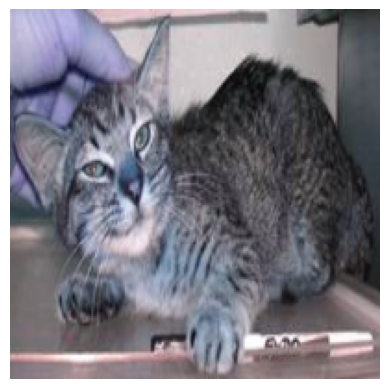

In [74]:
plt.axis("off")
plt.imshow(X_train[256])

In [77]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

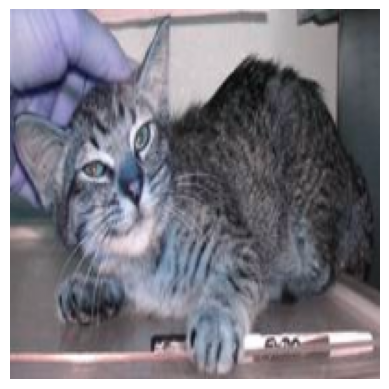

In [78]:
plt.axis("off")
plt.imshow(X_train_scaled[256])

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
             
model.fit(X_train_scaled, y_train, epochs=10)

In [85]:
len(X_train_scaled)

8005

In [86]:
len(y_train)

8005